<a href="https://colab.research.google.com/github/madoe001/tf-agents-super-mario/blob/main/Gym_Retro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trainieren eines Reinforcement Learning Models mit TF-Agents, welches Super Mario spielen kann


## 1. Vorwort
Im Rahmen der Modulsprüfung zum Modul "Machine Learning" des  Verbundsstudiengangs "Angewandte Informatik" der Fachhochschule Südwestfalen, ist eine Ausarbeitung anzufertigen, welche sich thematisch mit dem Erstellen von Machine Learning-Modellen auseinandersetzt. 

Dazu wurden von den jeweiligen Studierenden, Projektvorschläge vorgelegt. Die vorliegende Arbeit, setzt sich mit der Anwendung von Reinforcement Learning-Algorithmen auseinander. Als Anwendungsszenario wurde das Erstellen eines Models, welches in der Lage ist das Nintendo Spiel "Super Mario Bros.", gewählt.


## 2. Projektbeschreibung
Das Ziel des Projekts ist die Entwicklung eines Machine Learning Models, welches eigenständig lernt "Super Mario Bros." zu spielen. Die Umsetzung dieses Models erfolgt mit Hilfe der Machine Learning Bibliothek Tensorflow, Tensorflow-Agents und Open-AI Gym Retro.

## TensorFlow-Agents

[Quelle](https://www.tensorflow.org/agents)

## OpenAI-Gym / OpenAI-Gym Retro

## Q-Learning

## Deep Q-Learning

## Policy Gradient


## Proximal Policy Optimization (PPO)

# 3. Reinforcement Learning
Reinfocrcement Learning ist eine Disziplin des Machine Learnings. Mit ihr ist es möglich ein Model zu trainieren, welches in der Lage ist selbstständig Aufgaben zu lösen. Das zu trainierende Model heißt *Agent*. Dieser beobachtet eine *Umgebung*, wie zum Beispiel eine Spielwelt. Der Agent kann mit Hilfe von *Aktionen* mit dieser Spielwelt interagieren. Eine Aktion ist zum Beispiel eine Seitwärtsbewegung einer Spielfigur oder ein Zug im Schach. Das Model erhält nach der Durchführung eine Belohnung und eine Beobachtung. Die Belohnung, auch Reward genannt, dient dazu die Interaktion des Agents mit der Umgebung zu bewerten. Ziel des Models ist es anhand der Belohnungen die beste Strategie zu entwickeln um das gegebene Problem zu lösen. 


## 4. Super Mario Bros.

[Quelle](https://de.wikipedia.org/wiki/Super_Mario_Bros.)

Super Mario Bros. ist ein Jump-'n'-Run Videospiel, der Firma Nintendo. Der Spieler übernimmt in dem Spiel die Rolle des Klempners Mario. Mit der Figur Mario, muss der Spieler anschließend Hindernisse überwinden und Gegner besiegen. Die Spielwelt ist zweidimensional und beinhaltet verschiedene Level mit unterschiedlichen Schwierigkeitsgraden. Ziel eines Levels ist es das Schloss am Ende einese Levels zu erreichen. Die Spielfigur bewegt sich dazu von der linken Seite eines Levels zur rechten Seite. 



### Aktionen:
Zur Steuerung der Spielfigur "Mario" stehen dem Spieler folgende Aktionen zur Verfügung. Diese können beliebig miteinander kombiniert werden, wodurch der Aktionsraum verhältnismäßig groß wird.

*   **Pfeiltaste Links/Rechts:** <br/>
 * Bewegt die Figur nach links oder Rechts

*   **Pfeiltaste Unten:** <br/>
 * Durch drücken der Pfeiltaste unten, duckt sich Mario. 
 * Steht Mario zu dem  Zeitpunkt auf einer Röhre, kann er diese, die Röhre betreten.
 * Runterklettern von Ranken
 
* **Pfeiltaste Unten:** <br/>
 * Raufklettern von Ranken

*   **A-Knopf:** <br/>
 * Durch drücken des A-Knopfs springt Mario.

*   **B-Knopf:** <br/>
 * Durch drücken des B-Knopfs sprintet Mario und kann gegebenenfalls Feuerbälle werfen.

### Umgebung:
Die Umgebung ist eine Open-AI Gym Retro Umgebung, die mit Hilfe eines Emulators das Spiel rendert. Das Spiel "Super Mario Bros." ist eine zweidimensionale Spielwelt. Insgesamt besteht sie aus 224 x 240 Pixeln. Pro Pixel sind drei Werte angegeben, die den jeweiligen Farbkanal (RGB) codieren. 

### Belohnung
Die Belohnung, welche durch die Open-AI Gym Retro bereitgestellt wird, ist die Bewegung des Bildschirm nach rechts. Umso weiter der Agent es schafft in dem Level nach rechts zu kommen, desto höher ist die Belohnung. Das Level ist absolviert, sobald "Super Mario" im Spiel das Schloss erreicht hat. Die Umgebung signalisiert dies mit dem flag *done*. 

### Beobachtung
Als Beobachtung wird ein Screenshot des aktuellen Zustands der Spielwelt zurückgeliefert. Bei Super Mario ist dies ein Array in der Form 224 x 240 x 3. Dieses beinhaltet 224 x 240 Pixel, welche durch drei Farbwerte codiert werden.

# 5. Projekt

Installieren der benötigten Abhängigkeiten

In [1]:
!sudo apt-get update
!sudo apt-get install -y xvfb ffmpeg > /dev/null
!pip install 'imageio==2.4.0' > /dev/null
!pip install pyvirtualdisplay > /dev/null
!pip install tf-agents > /dev/null
!pip install gym-retro > /dev/null
!pip install retrowrapper > /dev/null

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad.net/gra

Mounten eines Google-Drive Laufwerks um dem Notebook die ROM für Super Mario zur Verfügung zu stellen.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importieren der benötigten Abhängikeiten.

In [3]:
from __future__ import absolute_import, division, print_function

import base64
import imageio
import IPython
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import pyvirtualdisplay

import tensorflow as tf

from tf_agents.agents.dqn import dqn_agent 
from tf_agents.environments import suite_gym
from tf_agents.environments import utils
from tf_agents.environments import tf_py_environment
from tf_agents.specs import array_spec
from tf_agents.eval import metric_utils
from tf_agents.metrics import tf_metrics
from tf_agents.networks import sequential
from tf_agents.policies import random_tf_policy
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.trajectories import trajectory
from tf_agents.specs import tensor_spec
from tf_agents.utils import common

Erstellen eines virtuellen Displays, um der Bibliothek eine Ausgabe des Bildes zu simulieren

In [4]:
display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()

Importieren der "Super Mario Bros."-ROM mit Hilfe des von OpenAI-Gym Retro bereitgestellten Skripts.

In [5]:
!python3 -m retro.import "/content/drive/MyDrive/ROMS/"

Importing SuperMarioBros-Nes
Imported 1 games


Validieren, dass die OpenAI-Gym Umgebung korrekt funktioniert.

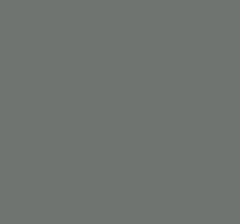

In [6]:
import retro
env = retro.make(game='SuperMarioBros-Nes')
img = PIL.Image.fromarray(env.render(mode="rgb_array"))
img

In [7]:
env.get_screen().shape

(224, 240, 3)

In [8]:
right_action = [0, 0, 0, 0, 0, 0, 0, 1, 0]
#env.reset()

#PIL.Image.fromarray(env.render(mode="rgb_array"))
possible_actions = []
for index in range(9):
  action = [0]*9
  action[index] = 1
  possible_actions.append(env.get_action_meaning(action))

print(possible_actions)


[['B'], [], [], [], ['UP'], ['DOWN'], ['LEFT'], ['RIGHT'], ['A']]


In [9]:
def takeOneValues(source, target): 
  for idx, value in enumerate(source):
    if value == 1: 
      target[idx] = 1
  return target

def combine(list1, list2): 
  if len(list1) > len(list2): 
    size = len(list1)
  else:
    size = len(list2)
  newList = [0]*size
  takeOneValues(list1, newList)
  takeOneValues(list2, newList)
  return newList


In [10]:
single_actions = {} 

for index in range(9):
  action = [0]*9
  action[index] = 1
  key = env.get_action_meaning(action)
  if len(key) >= 1: key = key[0]
  else: continue
  single_actions[key] = action


single_actions

{'A': [0, 0, 0, 0, 0, 0, 0, 0, 1],
 'B': [1, 0, 0, 0, 0, 0, 0, 0, 0],
 'DOWN': [0, 0, 0, 0, 0, 1, 0, 0, 0],
 'LEFT': [0, 0, 0, 0, 0, 0, 1, 0, 0],
 'RIGHT': [0, 0, 0, 0, 0, 0, 0, 1, 0],
 'UP': [0, 0, 0, 0, 1, 0, 0, 0, 0]}

In [11]:
actions = [
    ['A'],
    ['B'],
    ['RIGHT', 'A'],
    ['RIGHT', 'B'],
    ['B','RIGHT', 'A'],
    ['LEFT', 'A'],
    ['LEFT', 'B'],
    ['B','LEFT', 'A'],
    ['UP'],
    ['DOWN']
]

In [12]:
action_values =  []
for idx, action in enumerate(actions):
  x = []
  for key in action:
    x = combine(x, single_actions[key])
  action_values.append(x)
action_values

[[0, 0, 0, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 1],
 [1, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 1],
 [1, 0, 0, 0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0]]

In [13]:
env.close()

## Super Mario Wrapper
Da "Super Mario Bros" standardmäßig einen Action-Spec mit einer Form von (9,) hat, muss dieser um korrekt mit eine selbstgeschriebenen Wrapper geflattet werden. 

In [14]:
from tf_agents.environments import PyEnvironmentBaseWrapper

#flat_action_spec = array_spec.BoundedArraySpec(shape=(), dtype=np.int32, minimum=0, maximum=len(actions), name='action')

class SuperMarioActionWrapper(PyEnvironmentBaseWrapper):

  def __init__(self, env, actions=[]):
    super(PyEnvironmentBaseWrapper, self).__init__()
    self._env = env
    self._actions = actions
    self._action_spec = array_spec.BoundedArraySpec(
        shape=(), 
        dtype=np.int32, 
        minimum=0, 
        maximum=len(actions) - 1, 
        name='action'   
    )
    self._time_step_spec = array_spec.BoundedArraySpec(
        shape=(), 
        dtype=np.int32, 
        minimum=0, 
        maximum=len(actions) - 1, 
        name='time'   
    )
      
  def observation_spec(self):
    return self._observation_spec
    
  def action_spec(self):
    return self._action_spec

  def _step(self, action):
    return self._env.step(self._actions[action.item()])

# Wrappen der Umgebungen
Die Umgebung werden mit Hilfe verschiedener Klassen gewrappt. Dies hat den Vorteil, dass das Lernen beschleunigt und optimiert wird. Des Weiteren wird die Open-AI-Gym Retro Umgebung angepasst, sodass der Actionspace geflatted wird. Für den DQN-Algorithmus von TF-Agents ist ledeglich ein eindimensionaler Actionspace erlaubt. Der Wrapper FlattenActionWrapper transformiert den Actionspace des "Super Mario"-Spiels entsprechend.

In [15]:
def close(): 
  if eval_py_env is not None: eval_py_env.close()
  if train_py_env is not None: train_py_env.close()

In [16]:
from tf_agents.environments.gym_wrapper import GymWrapper
from gym.wrappers import FrameStack
from tf_agents.environments import atari_wrappers
from tf_agents.environments import wrappers
import gym

def wrap_env(env): 
  # env = gym.wrappers.GrayScaleObservation(env)
  # env = gym.wrappers.ResizeObservation(env, 84)
  env = gym.wrappers.RecordEpisodeStatistics(env)
  env = gym.wrappers.FrameStack(env, 4)
  env = GymWrapper(env)
  env = SuperMarioActionWrapper(env, action_values)
  env = wrappers.TimeLimit(env, 10_000)
  env = wrappers.ActionRepeat(env, times=4)
  return env

In [17]:
#game.close()

In [18]:
from tf_agents.environments.gym_wrapper import GymWrapper
from tf_agents.environments import wrappers
from tf_agents.environments import utils

game = retro.make(game='SuperMarioBros-Nes')

train_py_env = wrap_env(game) 

# utils.validate_py_environment(train_py_env, episodes=1)

In [19]:
game.close()
train_py_env.close()

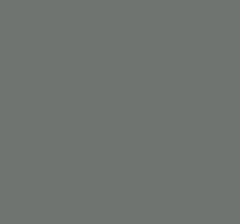

In [72]:
img = PIL.Image.fromarray(train_py_env.render(mode="rgb_array"))
img

Umwandeln der Python-Umgebungen in Tensorflowumgebungen ([Quelle](https://www.tensorflow.org/agents/tutorials/2_environments_tutorial#tensorflow_environments))

In [19]:
train_env = tf_py_environment.TFPyEnvironment(train_py_env)

GPU einschalten

Erstellen eines Critic-Netzwerks, welches fürs Training genutzt wird.

Erstellen eines QNetworks, welches aus mehreren Schichten besteht und am ende für jede Action eine Ausgabe liefert. (Quelle: Buch S.654)

In [20]:
from tf_agents.networks.q_network import QNetwork

perprocessing_layer = tf.keras.layers.Lambda(
   lambda obs: tf.cast(obs, np.float32) / 255.)

conv_layer_params=[(32, (8, 8), 4), (64, (4, 4), 2), (64,(3, 3), 1)]
fc_layer_params = [512]

q_net = QNetwork(
    train_env.observation_spec(),
    train_env.action_spec(),
    preprocessing_layers=perprocessing_layer,
    conv_layer_params=conv_layer_params,
    fc_layer_params=fc_layer_params
)

Initialisieren des Agents

In [21]:
# optimizer = tf.keras.optimizers.Adam(learning_rate=2-5e-4)

optimizer = tf.keras.optimizers.RMSprop(lr=2.5e-4, rho=0.95, momentum=0.0, epsilon=0.00001, centered=True)

train_step_counter = tf.Variable(0)

epsilon_fn = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=1.0,
    decay_steps=250_000,
    end_learning_rate=0.01
)

agent = dqn_agent.DdqnAgent(
    train_env.time_step_spec(),
    train_env.action_spec(),
    q_network=q_net,
    optimizer=optimizer,
    td_errors_loss_fn=common.element_wise_squared_loss,
    gamma=0.99,
    train_step_counter=train_step_counter,
    epsilon_greedy=lambda: epsilon_fn(train_step_counter)    
)

agent.initialize()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [22]:
from tf_agents.replay_buffers.tf_uniform_replay_buffer import TFUniformReplayBuffer

replay_buffer = TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=train_env.batch_size,
    max_length=10_000
)

In [23]:
replay_buffer_observer = replay_buffer.add_batch

## Metriken erstellen

In [24]:
from tf_agents.metrics import tf_metrics

train_metrics = [
      tf_metrics.NumberOfEpisodes(),
      tf_metrics.EnvironmentSteps(),
      tf_metrics.AverageReturnMetric(),
      tf_metrics.AverageEpisodeLengthMetric()
]

In [25]:
class ShowProgress:
  def __init__(self, total):
    self.counter = 0
    self.total = total

  def __call__(self, trajectory):
    if not trajectory.is_boundary():
      self.counter += 1
    if self.counter % 100 == 0:
      print("\r{}/{}".format(self.counter, self.total), end="")

Der Stepdriver sammelt alle 4 Schritte die Erfahrungen ein und Schreibt diese in den Replay-Buffer. (Quelle: S.659)

In [26]:
from tf_agents.drivers.dynamic_step_driver import  DynamicStepDriver

collect_driver = DynamicStepDriver(
    train_env,
    agent.collect_policy,
    observers=[replay_buffer_observer] + train_metrics,
    num_steps=4
)

### Vorbefüllen des Replaybuffers

In [27]:
from tf_agents.policies.random_tf_policy import RandomTFPolicy

init_policy = RandomTFPolicy(
    train_env.time_step_spec(),
    train_env.action_spec()
)

init_driver = DynamicStepDriver(
    train_env,
    init_policy,
    observers=[replay_buffer.add_batch, ShowProgress(20000)] + train_metrics,
    num_steps=20000
)

## Erstellen eines Datasets

In [28]:
dataset = replay_buffer.as_dataset(
    sample_batch_size=64,
    num_steps=2,
    num_parallel_calls=3, 
    single_deterministic_pass=False
).prefetch(3)

Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


## Trainingsschleife erstellen

In [29]:
from tf_agents.utils.common import function

collect_driver.run = function(collect_driver.run)
agent.train = function(agent.train)


In [30]:
from tf_agents.eval.metric_utils import log_metrics

def train_agent(n_iterations = 1000):
  time_step = None
  policy_state = agent.collect_policy.get_initial_state(train_env.batch_size)
  iterator = iter(dataset)
  for iteration in range(n_iterations):
    time_step, policy_state = collect_driver.run(time_step, policy_state)
    trajectories, buffer_info = next(iterator)
    train_loss = agent.train(trajectories)
    print("\r{} loss:{:.5f}".format(
        iteration, train_loss.loss.numpy()), end=""
    )
    if iteration % 100 == 0:
      log_metrics(train_metrics)

In [31]:
train_agent(1_000)

Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))
999 loss:76062146560.00000

In [32]:
train_env.close()

# Erstellen eines Videos

In [33]:
game = retro.make(game='SuperMarioBros-Nes')

eval_py_env = wrap_env(game)

# utils.validate_py_environment(eval_py_env, episodes=1)

eval_env = tf_py_environment.TFPyEnvironment(eval_py_env)

In [32]:
eval_env.close()

In [34]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)

In [35]:
def create_policy_eval_video(policy, filename='imageio', num_episodes=5, fps=30):
  video_filename = filename + '.mp4'
  with imageio.get_writer(video_filename, fps=fps) as video:
    for _ in range(num_episodes):
      time_step = eval_env.reset()
      video.append_data(eval_py_env.render())
      while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = eval_env.step(action_step.action)
        video.append_data(eval_py_env.render())
  return embed_mp4(video_filename)

In [37]:
create_policy_eval_video(agent.policy, filename='first', num_episodes=3, fps=30)